# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/andy/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


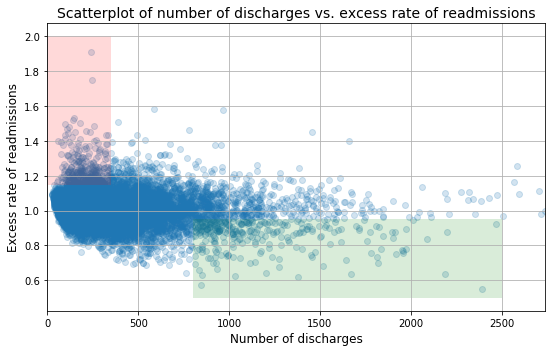

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Exploratory Examination of Hospital Size

Before doing an analysis, I want to take a general look at the data.

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


Now let's look at some histograms of the variable used to represent hospital size.

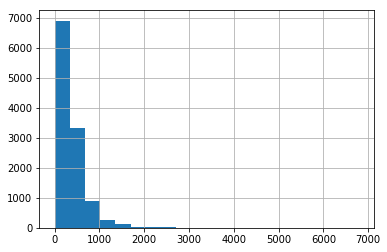

In [8]:
clean_hospital_read_df['Number of Discharges'].hist(bins=20)
plt.show()

The distribution is highly skewed, which is not surprising for a size variable.  Let's try the logarithm to get a better sense of the distribution.

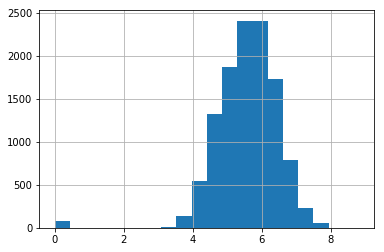

In [9]:
np.log1p(clean_hospital_read_df['Number of Discharges']).hist(bins=20)
plt.show()

It looks like there are some outliers on the left (possibly errors?).  Other than that, the distribution of the logarithm looks fairly symmetric.  I'll try shifting a bit more before taking the logarithm, so as to focus on the bulk of the distribution.

In [10]:
np.exp(4)

54.598150033144236

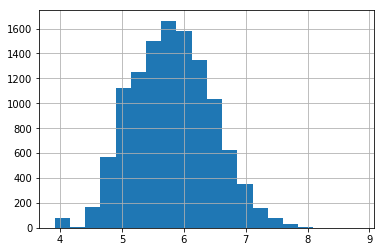

In [11]:
shift = 50
np.log(clean_hospital_read_df['Number of Discharges']+shift).hist(bins=20)
plt.show()

It looks like that shift went too far. Let's try a smaller one.

In [12]:
np.exp(3)

20.085536923187668

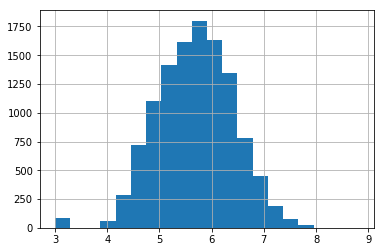

In [13]:
np.log(clean_hospital_read_df['Number of Discharges']+20).hist(bins=20)
plt.show()

Now that looks nearly symmetric, but I want to look in closer detail, so I'll increase the number of bins.

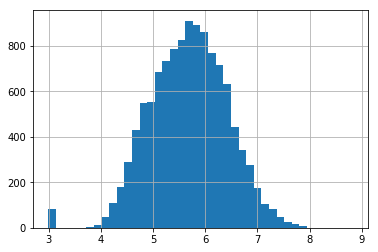

In [14]:
shift = 20
np.log(clean_hospital_read_df['Number of Discharges']+shift).hist(bins=40)
plt.show()

Now that's what a distribution should look like!  I'll try to categorize hospitals based on where they fall in the distribution.  First, though, let's separate out the points at the far left, since they don't seem to be part of the main distribution.

In [15]:
np.exp(3.5)-shift

13.115451958692312

I'm going to put sizes less than 14 in a category by themselves.  As for the rest...

In [16]:
not_tiny = clean_hospital_read_df['Number of Discharges'] > 13
log20p_discharges = np.log(clean_hospital_read_df.loc[not_tiny, 'Number of Discharges']+20)
s = log20p_discharges.std()
m = log20p_discharges.mean()
m, s

(5.704706028708607, 0.7032384677801838)

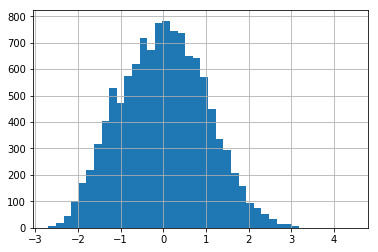

In [17]:
discharges_stdize = (log20p_discharges-m)/s
discharges_stdize.hist(bins=40)
plt.show()

Looks reasonable, but there are some outliers on the right.  I'm going to make cutoff points to divide this distribution into categories with width equal to one standard deviation.

## Categorization of Hosptials

In [18]:
m, s, shift

(5.704706028708607, 0.7032384677801838, 20)

In [19]:
def raw(x):
    return np.exp(x*s+m)-shift
cutoffs = [14] + [raw(-1.5), raw(-0.5), raw(+0.5), raw(+1.5), raw(+2.5)]
cutoffs

[14,
 84.56912406551724,
 191.25940687222104,
 406.80415840568355,
 842.2659332872379,
 1722.0227171287322]

In [20]:
names = ['tiny', 'very small', 'small', 'medium', 'large', 'very large', 'huge']

In [21]:
# Categorize hospital size based on empirical distribution
def categorize(x, bins, names):
    if len(bins)+1 != len(names):
        raise ValueError('Names must be one longer than bins')
        return(None)
    bins = sorted(bins)
    for b,n in zip(bins,names[:-1]):
        if x<b:
            return(n)
    return(names[-1])

df = clean_hospital_read_df
df['sizecat'] = clean_hospital_read_df['Number of Discharges'].apply( 
    categorize, args=(cutoffs, names) )
df.sizecat.value_counts()

medium        4133
small         2943
large         2850
very small     772
very large     730
tiny            81
huge            69
Name: sizecat, dtype: int64

## Analysis of Readmission Rates by Size

Let's look at the excess readmission ratios by size category.

In [22]:
# Excess readmission rates by hospital size category
df.groupby('sizecat')['Excess Readmission Ratio'].mean().reindex(names)

sizecat
tiny               NaN
very small    1.028231
small         1.011465
medium        1.009274
large         1.001902
very large    0.986989
huge          0.949017
Name: Excess Readmission Ratio, dtype: float64

That certainly looks like a nice pattern and tends to confirm the preliminary analysis.  (Apparently there is no useful information in the "tiny" category.)  To make this statistically rigorous, let's look at whether the differences in adjacent categories are statistically significant.  (I'm going to assume the observations are independent and identically distributed, in the absence of information to the contrary.)  Specifically, I'm going to test the five separate null hypotheses that the differences in readmission rates in adjacent size categories are equal.  I'll apply a Bonferroni correction to the collective result, since there are multiple hypotheses.

In [23]:
rr = df['Excess Readmission Ratio']
from scipy import stats
for n0, n1 in zip(names[1:-1],names[2:]):
    print('\n Between ' + n0 + ' and ' + n1 + ':')
    print( stats.ttest_ind(rr[df.sizecat==n0], rr[df.sizecat==n1], equal_var=False) )


 Between very small and small:
Ttest_indResult(statistic=7.184801859958535, pvalue=9.490003964807107e-13)

 Between small and medium:
Ttest_indResult(statistic=1.055638009254682, pvalue=0.29117135134460315)

 Between medium and large:
Ttest_indResult(statistic=3.119097230830928, pvalue=0.0018229783201221892)

 Between large and very large:
Ttest_indResult(statistic=3.1856664812390423, pvalue=0.0014877754547244252)

 Between very large and huge:
Ttest_indResult(statistic=2.2406932876383046, pvalue=0.027906113398909995)


Individually, except for the difference between small and medium, these are all statistically significant at 0.05 level, and 3 out of the 5 differences are significant at the 0.01 level. (I used two-tailed tests because that's what stats.ttest_ind does. In this case, one-tailed test might be more appropriate, but dividing the p-values by two won't change the results qualitatively.)

To assess the tests collectively, I apply the Bonferroni correction by multiplying the p-values by 2/5, thus shifting from a two-tailed test of one hypothesis to a one-tailed test of 5 hypotheses.  By this criterion, we still reject the null hypothesis at the 0.01 level of significance for 3 of the 5 differences (very small vs. small, medium vs. large, and large vs. very large).  And we can conclusively reject the general null hypothesis that readmission rates are the same for different size hospitals.

## Conclusions

In the light of these tests, I mostly agree with the conclusions of the preliminary analysis.  

However, there remains the question of practical significance.  To my untrained eye, the differences seem fairly small:  even between very small and very large hospitals, the difference is only 4 percentage points.  But is that really a small difference?  It depends on the costs involved, and I believe a proper assessment would require either a direct study of the costs or the opinion of someone with more domain expertise than I have.

I'm therefore inclined to be less hasty about my recommendations than the preliminary analysis.  Consolidation itself may have costs:  for example, an increased concentration of market power may make hospitalization more costly for payers.  (On the other hand, market power could be a net benefit if smaller hospitals are currently struggling.)  And one has to ask why smaller hospitals exist in the first place.  Perhaps they serve a critical need (e.g. serving underserved geographical areas).  Perhaps increasing the regulatory burden on them would therefore be harmful to potential patients to a degree that could not be justified by the cost savings.  One can even imagine a scenario where the more stringent regulatory requirement drives small hospitals out of business and the need to transport patients to larger hospitals results in costs that exceed the cost savings from more efficient hospitalization.  All in all, the empirical result is interesting, but it is too early to draw specific policy conclusions.

## Visualization Issues

A scatterplot, in principle, has the advantage that it doesn't require any assumptions. For example, it's not necessary to divide the data into categories.  However, when, as in this case, there are many data points, a scatterplot has the disadvantage of being hard to interpret, because so many points are bunched together.  The scatterplot in the preliminary analysis partly addresses this problem by using partial transparency, so we can at least see where the points are densely packed.  But from the raw scatterplot, without the colored shadings imposed by the preliminary analyst, it's still hard to tell whether or not there's much information here.  The shadings themselves seem possibly forced.  Again, from the plot it's hard to tell whether the information is real.

One alternative would be to divide the hospitals into categories and use a bar chart. This does impose an assumption, but I think my analysis of hospital size above justifies the categories used as being a natural way to split the distribution.

Visualization experts can be quite adamant about the need to start bar charts from zero.  If we apply this principle to the "Excess Readmission Ratio" as presented in the data, we get the following:

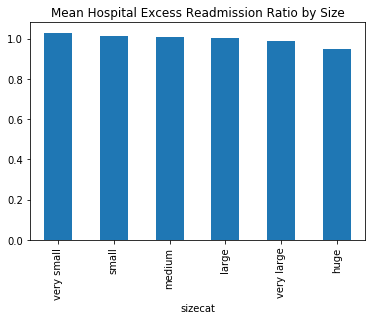

In [24]:
table = df.groupby('sizecat')['Excess Readmission Ratio'].mean().reindex(names)
table[table.index!='tiny'].plot(kind='bar')
plt.title('Mean Hospital Excess Readmission Ratio by Size')
plt.show()

From this chart it looks like there isn't much difference between readmission ratios.  You might have to squint to see any difference at all.  So if you think "Excess Readmission *Ratio*" is a good measure, this chart makes the point that there is little practical significance to the differences. However...

It may be an arbitrary choice to express excess readmission as a ratio. In fact the concept seems rather strange: the word "excess" seems to imply that we care about the difference from 1.0 rather than the ratio. So let's try expressing excess readmissions as a percent rather than a ratio:

Text(0.5, 1.0, 'Mean Hospital Percent Excess Readmissions by Size')

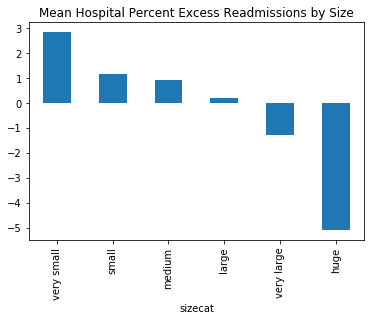

In [25]:
(100*(table[table.index!='tiny']-1)).plot(kind='bar')
plt.title('Mean Hospital Percent Excess Readmissions by Size')

I think this visualization is quite permissible, and it makes the point that readmissions are correlated with size categories.  Now, is 1%, or 2%, or 3%, a lot, or just a small difference?  Without knowing more about the costs involved, it's hard to say.